# Unsupervised Learning - Recommender Project Intro

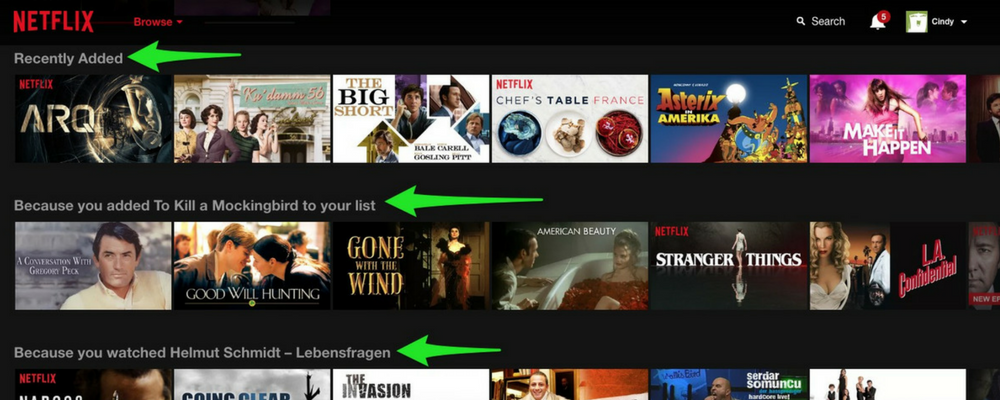


([source](https://blog.re-work.co/how-does-netflix-know-what-movies-youll-enjoy/))

## Recommender Project Intro

<img src="week10_narrative.png"></img>

### The plan:

The goal this week is to make your own **movie recommender** - a proof-of-concept piece of software which will **make movie recommendations** to a user visiting a **web app** that you build yourself! 



### The data

We will be working with the [movielens](https://grouplens.org/datasets/movielens/) dataset. It comes in several different sizes, from 100K ratings (1MB) to 1B generated ratings (3GB). We recommend using the smallest dataset ([`ml-latest-small`](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html)) and making sure your recommender is working on that to begin with. As an advanced extension to the project, you can then work on incorporating the larger datasets.

## Unsupervised Learning

So far in the course we have been dealing with **supervised learning** - that is, we have some data `X` and some known targets `y` and we train a model to predict on X by minimising error compared to the real target values. 
**In unsupervised learning we just have** `X` and we want to learn the patterns/structure (probability distribution) of `X`.


### Q: What use cases does unsupervised ML have ?

**We might need to used unsupervised ML when:**
- if we don't have labels


- if we want to generate labels


- discover patterns in data that we didn't see before

**Common use cases for unsupervised learning:**
- customer or user segmentation/clustering (**e.g. K-means Clustering**)


- fraud/anomaly/outlier detection (**e.g. Isolation Forest Model, DBSCAN, Gaussian Mixture,  OneClass SVM**)


- dimensionality reduction (**e.g. Principal Component Analysis (PCA) and Non-Negative Matrix Factorization (NMF)**)

### Methods of unsupervised learning:

The main examples of unsupervised learning, some of which we look at in this project, are:

**Matrix Factorization (Dimensionality Reduction): NMF, PCA**

- Derive a dense representation of the sparse rating vectors
- (in recommender systems: Explain users' ratings by looking at a reduced set of hidden features)


**Clustering: nearest neighbors, k-means clustering**

- Identify groups of similar users that share the same preferences
- in recommender systems: Recommend items that other users of the cluster liked

**Outlier/ Anomaly detection**

- Identify users that don't follow the usual pattern (distribution) of the data
- in recommender systems: Identify and remove bots that scrape your website for content

## Recommender Systems

> Given our complete database of products, which particular products should we showcase to a certain user when they visit the website?

- help users to find relevant content
- reduce the time that is spent on actively searching for items
- help to keep users engaged 

**Can you think of some examples of recommender systems that you encountered in your life?**

- Amazon 
- Targeted advertising (based on web search)
- Netflix
- BandsInTown recommending concerts
- TikTok 
- Spotify weekly recommendations
- Google ranks results according to your history
- Job Search websites

**How would you go about recommending a movie to someone?**

- based on **past data**:
    - look at movies someone watched/enjoyed in the past
    - recommend something in eg. the same genre, by the same director, with the same actor(s)
    
    
- based on **demographics**:
    - look at someone's friends list 
    - find *similar* users, see what they liked, and recommend that
    
    
- include **top rated movies** somehow - eg. IMDB top ten

**Explicit vs. implicit data collection and user feedback**:


1. *explicit*: ratings, liked items
    
2. *implicit*: viewing an item, putting an item into a basket or wishlist, listening to a song all the way through, watching the same film multiple times


- One issue could be the **[cold start problem](https://medium.com/@markmilankovich/the-cold-start-problem-for-recommender-systems-89a76505a7)** - if we do not have enough data about a new user, how can we know what to recommend them?

- What do we do if a brand new movie comes out that nobody has watched yet?


### Anatomy of a recommender system

#### 1. Items

In [ ]:
import pandas as pd

In [ ]:
ratings = pd.read_csv('user_item.csv', index_col=0)
#films = ratings.columns.tolist()
#films

In [ ]:
ratings

#### 2. Query
(The context that is the input for the recommender system)

##### Content based filtering

> items' or users' characteristics as input

- length and genre of a movie
- age and gender of the user
- time of the day

In [ ]:
# input for our recommender
query = {
    'userId': 123,    
    'length': '120',
    'genre': 'thriller',
    'age': 34,
    'time': '20:45'          
}
query

##### Collaborative filtering

> rating prediction based on users' explicit or implicit feedback

- *users who are similar to you also liked ...*
- *because you watched ... you may also like ...*

In [ ]:
query = {
        'Titanic': 4,
        'Star Wars': 1,
        'Pulp Fiction': 5
}
query

#### 3. General Approach

**3.1. Candidate generation**

> create a subset of potential items

Example:

+ items the user hasn't already interacted with
+ items watched more than 100 times 
+ items with an average rating above 4

**3.2. Scoring**

> given the query input, predict a score for each candidate item

Example:

+ the average rating of the top 10 most similar users

**3.3. Ranking**

> recommend the top 10 (5, 3, ..., k) items with the highest score

## Some examples in pandas

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read in data 

In [ ]:
ratings

## EDA

### How many entries or records we have?

### Look at missing values: the % of missing values

In [ ]:
percentage = ...
percentage

### Calculate the mean user and item ratings

In [ ]:
user_mean = ...
user_mean

In [ ]:
movie= ...
movie

### Calculate the number of ratings per user

In [ ]:
# counts non null values

### Filter for items that have been rated by at least 4 users

In [ ]:
item_filter =...
item_filter


In [ ]:
# apply filter on column
movies_candidate = ...
movies_candidate


### Recap: Convert the matrix into long format (hint: `pd.melt()`)

In [ ]:
long_format = ...

### ...and back to the wide format! (hint: `pd.pivot_table`)

In [ ]:
wide_format = ...

### Impute missing values

#### 1. Using the global mean

In [ ]:
global_mean = ...

In [ ]:
# fill the nan value


#### 2. Using item mean

In [ ]:
item_mean = ...

In [ ]:
# fill the nan value

#### 3. Using users' ratings' mean

In [ ]:
user_mean = ...

In [ ]:
# fill the nan value

### Exercise: Your first recommender

Implement a recommender function that recommends the most popular movies to a user! Work with either the movie ids or the movie titles.

In [ ]:
# collaborative filtering = look at ratings only!
def recommend_popular(query, ratings, k=10):
    """
    Filters and recommends the top k movies for any given input query. 
    Returns a list of k movie ids.
    """
    # 1. candidate generation
    
    # filter out movies that the user has already seen
    
    # filter out movies that have been watched by less than 20/50/100... users
    
   
    # 2. scoring
    
    # calculate the average rating for each movie
    
    
    # 3. ranking
    
    # return the top-k highest rated movie ids or titles

## What's next?

- You can do some reading about unsupervised learning and recommender systems
- Try the exercise above
- Start exploring the movies dataset